<a href="https://colab.research.google.com/github/will-genius/mlfcworkshop/blob/main/Accidents_Black_spot_Mapping_in_Kenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
%%capture
%pip install osmnx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  folium
import geopandas as gpd
from shapely.geometry import Point

In [50]:
df= pd.read_csv("ma3route_crashes_algorithmcode.csv")
df.head()

,crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
0,1,2018-06-06 20:39:54,2018-06-06,-1.263030,36.764374,1,0,0,0,0
1,2,2018-08-17 06:15:54,2018-08-17,-0.829710,37.037820,1,1,0,0,0
2,3,2018-05-25 17:51:54,2018-05-25,-1.125301,37.003297,1,0,0,0,0
3,4,2018-05-25 18:11:54,2018-05-25,-1.740958,37.129026,1,0,0,0,0
4,5,2018-05-25 21:59:54,2018-05-25,-1.259392,36.842321,1,1,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31064 entries, 0 to 31063
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   crash_id                   31064 non-null  int64  
 1   crash_datetime             31064 non-null  object 
 2   crash_date                 31064 non-null  object 
 3   latitude                   31064 non-null  float64
 4   longitude                  31064 non-null  float64
 5   n_crash_reports            31064 non-null  int64  
 6   contains_fatality_words    31064 non-null  int64  
 7   contains_pedestrian_words  31064 non-null  int64  
 8   contains_matatu_words      31064 non-null  int64  
 9   contains_motorcycle_words  31064 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 2.4+ MB


In [52]:
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'], errors='coerce')
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
print("lat range:", df['latitude'].min(), df['latitude'].max())
print("lon range:", df['longitude'].min(), df['longitude'].max())

lat range: -3.10000000200807 -0.565402313796744
lon range: 36.2839500025994 37.8794900005407


In [54]:
df['month'] = df['crash_datetime'].dt.month
df['year'] = df['crash_datetime'].dt.year
df['hour'] = df['crash_datetime'].dt.hour
df['dayofweek'] = df['crash_datetime'].dt.dayofweek

In [55]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='EPSG:4326')

In [56]:
gdf.to_file("crashes_cleaned.geojson", driver="GeoJSON")
gdf.to_csv("crashes_cleaned.csv", index=False)

Assess :
we shall now try to figure out if:

  There Are t months with higher accident rates ?

  What times of day see most accidents?

  Hotspots mapping


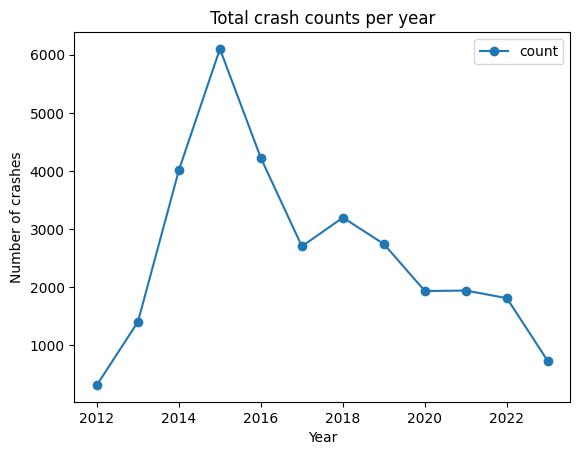

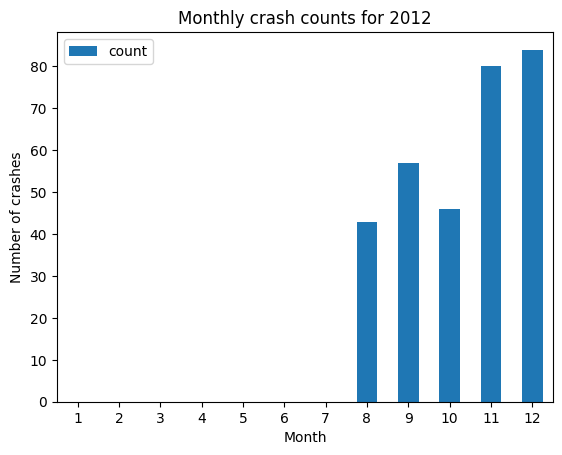

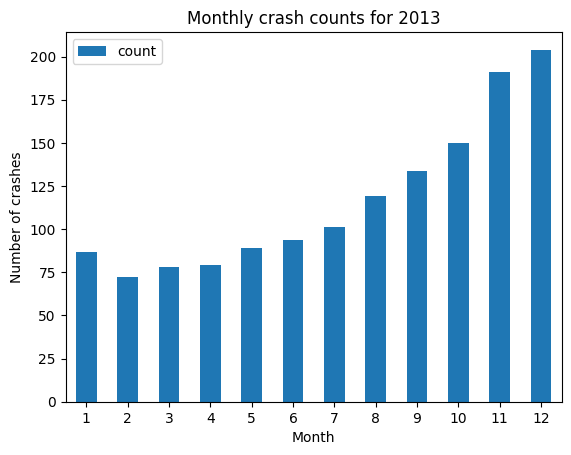

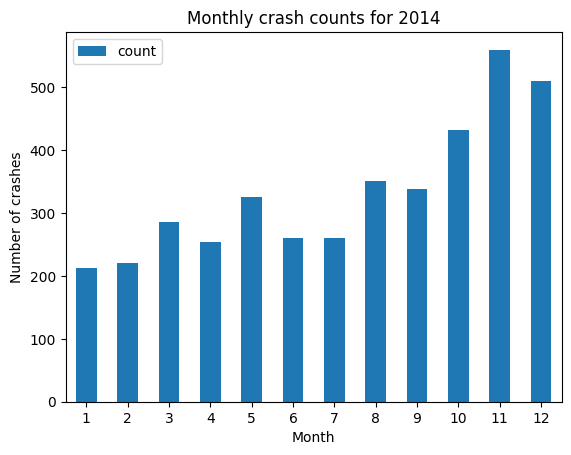

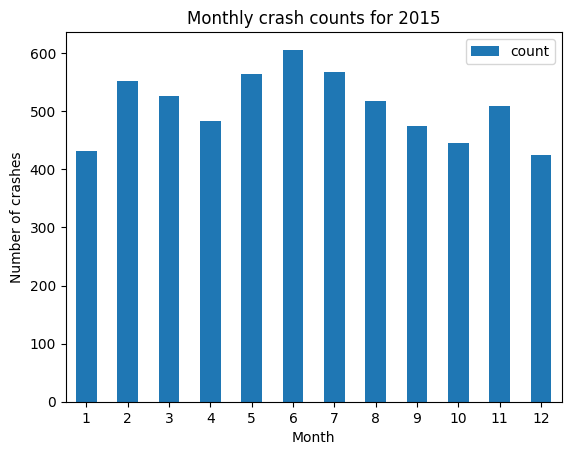

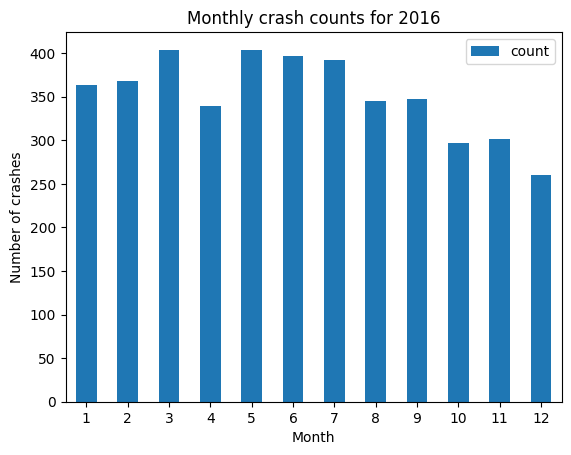

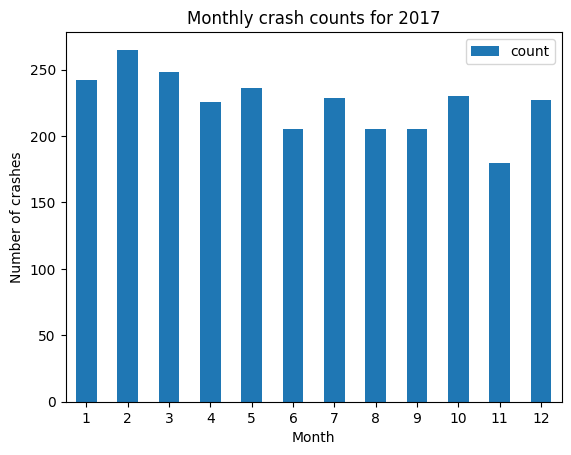

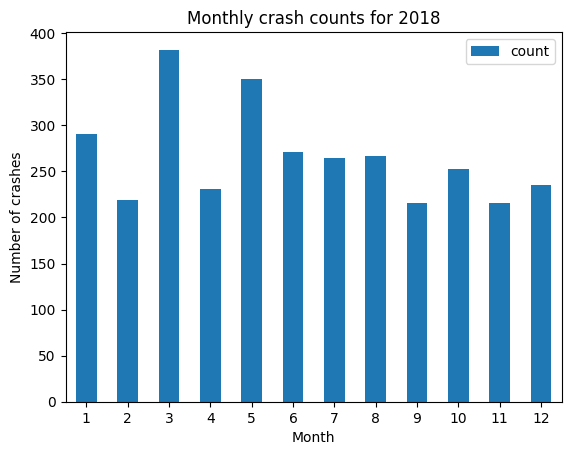

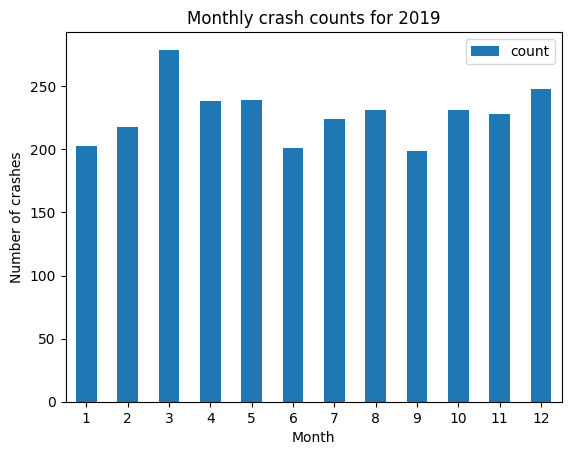

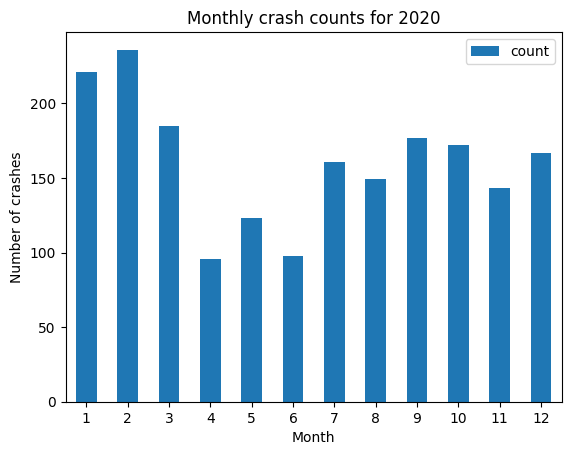

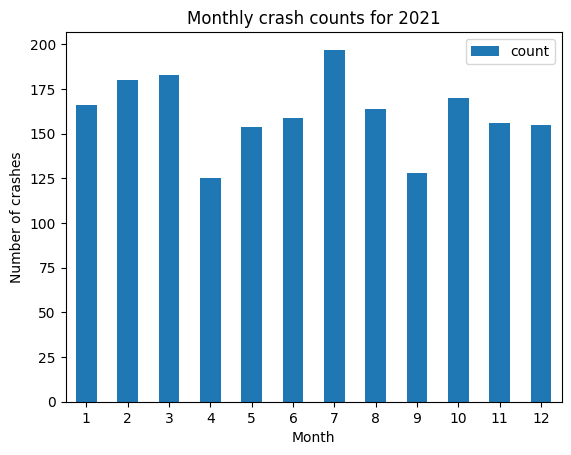

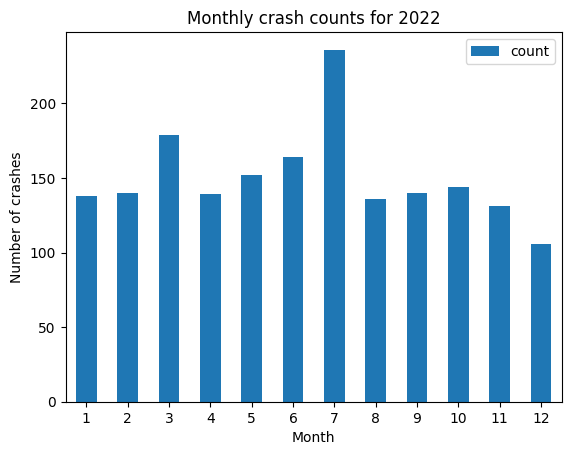

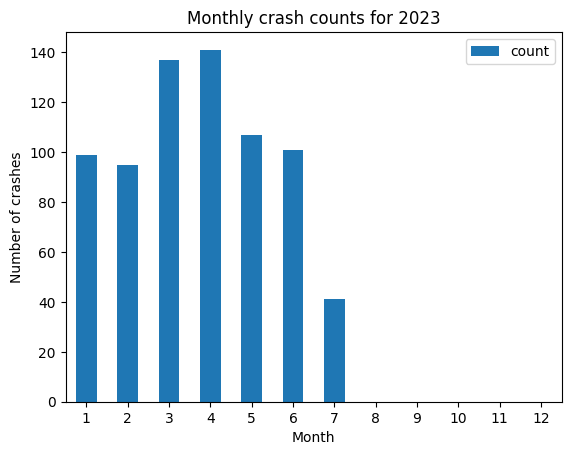

In [58]:
# Plot total crashes per year
yearly_counts = gdf.groupby('year').size().reset_index(name='count')
yearly_counts.plot(x='year', y='count', marker='o', linestyle='-')
plt.title("Total crash counts per year")
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.show()

# Series of bar plots for monthly crashes in each year
monthly_counts = gdf.groupby(['year','month']).size().reset_index(name='count')

years = monthly_counts['year'].unique()
for year in years:
    monthly_counts_year = monthly_counts[monthly_counts['year'] == year]
    monthly_counts_year = monthly_counts_year.set_index('month').reindex(range(1, 13), fill_value=0)
    monthly_counts_year.plot(kind='bar', y='count')
    plt.title(f"Monthly crash counts for {year}")
    plt.xlabel("Month")
    plt.ylabel("Number of crashes")
    plt.xticks(range(0, 12), range(1, 13), rotation=0)
    plt.show()

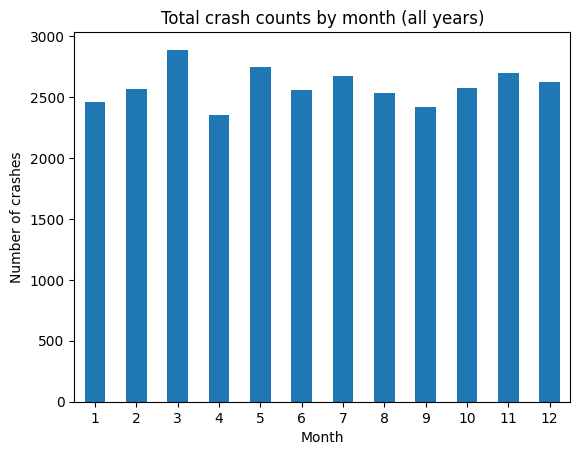

In [59]:
# Calculate total crashes per month across all years
month_totals = gdf['month'].value_counts().sort_index()

# Plot total crashes per month
month_totals.plot(kind='bar')
plt.title("Total crash counts by month (all years)")
plt.xlabel("Month")
plt.ylabel("Number of crashes")
plt.xticks(range(0, 12), range(1, 13), rotation=0)
plt.show()

In [70]:
!git clone https://github.com/will-genius/fynesse_template.git
import os, subprocess, importlib, sys
sys.path.append("/content/fynesse_template")
import fynesse

Cloning into 'fynesse_template'...
remote: Enumerating objects: 249, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 249 (delta 16), reused 13 (delta 12), pack-reused 226 (from 3)
Receiving objects: 100% (249/249), 163.02 KiB | 1.81 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [71]:
fynesse.access.combine_reports_folder("sample_data/Fatalities")

✅ Saved combined_reports/Accidents_2017.xlsx  (files: 187)


{'2017':       S/NO TIME 24 HOURS BASE/SUB BASE       COUNTY                      ROAD  \
 0      1.0           700        MAKUYU      MURANGA           NANYUKI NAIROBI   
 1      2.0           600       NYAMIRA      NYAMIRA          NYAMIRA NYAMAIYA   
 2      3.0          2200      NAIVASHA       NAKURU            NAIROBI NAKURU   
 3      4.0          1000        SAGANA    KIRINYAGA              SAGANA KAGIO   
 4      5.0          2245         THIKA       KIAMBU       THIKA  SUPERHIGHWAY   
 ...    ...           ...           ...          ...                       ...   
 1189   6.0          2055       BUNGOMA      BUNGOMA            BUNGOMA-MUMIAS   
 1190   1.0          1030        MALABA      BUNGOMA           BUNGOMA MALABA    
 1191   2.0          1320        KITALE  TRANS NZOIA  KAPENGURIA HOSPITAL ROAD   
 1192   3.0           500          MAUA         MERU               MAUA KIENGU   
 1193   4.0          1040       SUBUIGA         MERU            ISIOLO SUBUIGA   
 
      

In [72]:
df_2017= pd.read_excel("combined_reports/Accidents_2017.xlsx")
df_2017.head(50)

,S/NO,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,...,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,700,MAKUYU,MURANGA,NANYUKI NAIROBI,MUKEU,KCE 527P TOYOTA VAN,THE VEHICLE GOT A TYRE BURST AND ROLLED SEVERA...,UNKNOWN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,600,NYAMIRA,NYAMIRA,NYAMIRA NYAMAIYA,MAPUTI,KMCE 555X MAKE TVS,THE CYCLE RAMMED INTO THE LORRY,STEPHEN OMWANDAU,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2200,NAIVASHA,NAKURU,NAIROBI NAKURU,NYAMATHI,KCG 688D TOYOTA MATATU,THE VEHICLE KNOCKED DOWN THE VICTIM,PETER IRUNGU,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1000,SAGANA,KIRINYAGA,SAGANA KAGIO,GACHARU,KCF 223W TOYOTA FIELDER,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2245,THIKA,KIAMBU,THIKA SUPERHIGHWAY,TROJAN,KCF 675B NISSAN TIIDA,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,430,JUJA,KIAMBU,NAIROBI THIKA,JUJA FLY OVER,KCA 105M ISUZU CANTER,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.0,1900,DAGORETTI,NAIROBI,WAIYAKI WAY,MOUNTAIN VIEW,UNKNOWN,HIT AND RUN,UNKNOWN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,2000,ATHI RIVER,MACHAKOS,NaN,NaN,KCL 549H TOYOTA PASSO AND KMCP 129J,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.0,2230,KIKUYU,KIAMBU,THOGOTO GIKAMBURA,SOUTHERN BY PASS FLY OVER,GKB 743E AND KCB 867E/KAX 965Z T/SALOON,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5.0,2330,RUIRU,KIAMBU,NAIROBI THIKA SERVICE LANE,KIHUNGURO SHELL PETROL STATION,UNKNOWN,HIT AND RUN,UNKNOWN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


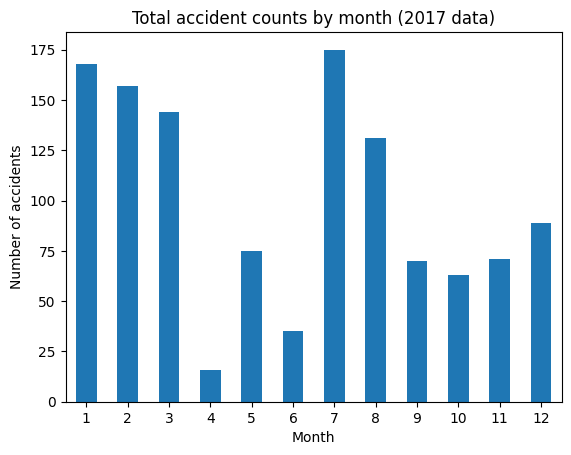

In [73]:
# Ensure the date column is in datetime format and extract the month
df_2017['Date'] = pd.to_datetime(df_2017['Date'])
df_2017['month'] = df_2017['Date'].dt.month

# Calculate total accidents per month
month_totals_2017 = df_2017['month'].value_counts().sort_index()

# Plot total accidents per month
month_totals_2017.plot(kind='bar')
plt.title("Total accident counts by month (2017 data)")
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.xticks(range(0, 12), range(1, 13), rotation=0) # Set x-ticks to month numbers 1-12
plt.show()

This shows that there is no particular pater for accident occurences per month over the years, However 2015 seems to have had the highest reported accident cases.

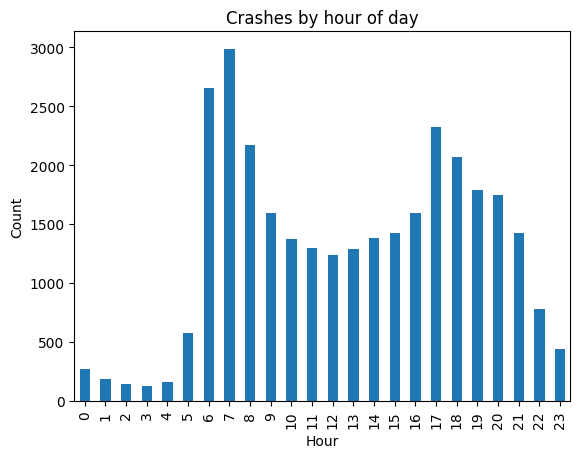

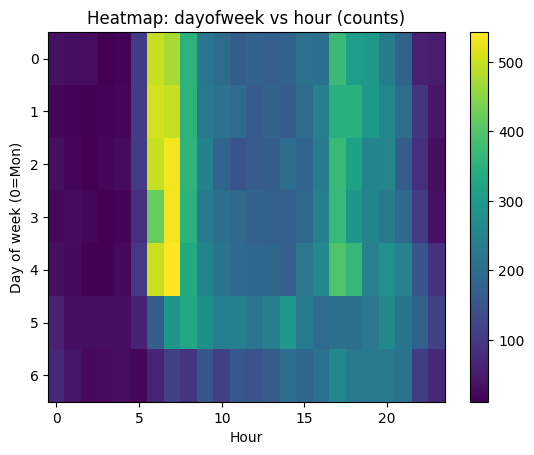

In [74]:
hour_counts = gdf['hour'].value_counts().sort_index()
hour_counts.plot(kind='bar')
plt.title("Crashes by hour of day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

# Heatmap: hour vs dayofweek
pivot = gdf.groupby(['dayofweek','hour']).size().unstack(fill_value=0)
plt.imshow(pivot, aspect='auto')
plt.title("Heatmap: dayofweek vs hour (counts)")
plt.xlabel("Hour")
plt.ylabel("Day of week (0=Mon)")
plt.colorbar()
plt.show()


This tell us that most accidents occured in the morning between 6 to 8 am and in the evening between 5 and 7 am.
The hetmap shows that this trend is mainly during the week days with weekend having fewer accidents, thus we can comfortably assume that the main cause of this accidents is people russhing to and from work or school on weekdays

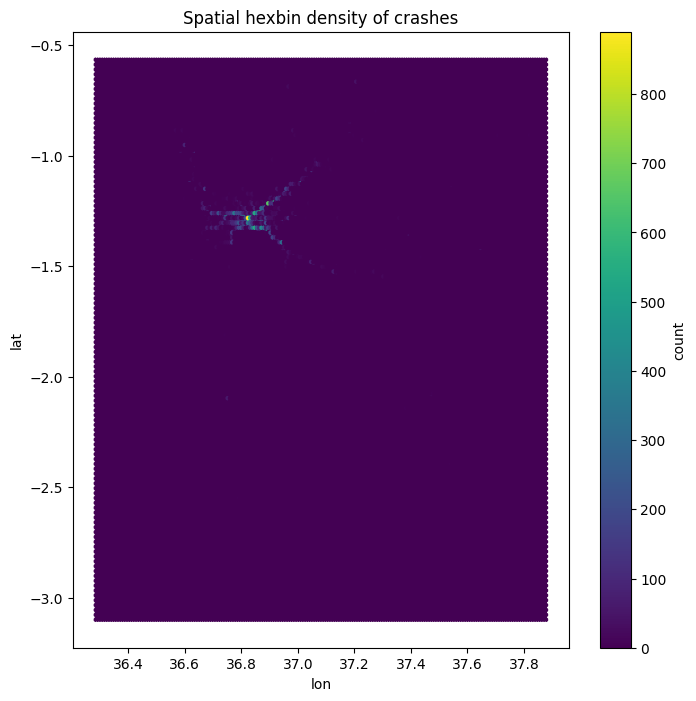

In [76]:
# quick hexbin with matplotlib (fast)
plt.figure(figsize=(8,8))
plt.hexbin(gdf['longitude'], gdf['latitude'], gridsize=200)
plt.title("Spatial hexbin density of crashes")
plt.xlabel("lon")
plt.ylabel("lat")
plt.colorbar(label='count')
plt.show()


In [81]:
import osmnx as ox
ox.settings.log_console = True

# define bounding box (small area) — pick a city bbox or compute around cluster centroid
north, south, east, west = gdf['latitude'].max()+0.02, gdf['latitude'].min()-0.02, gdf['longitude'].max()+0.02, gdf['longitude'].min()-0.02

G = ox.graph_from_bbox(north, south, east, west, network_type='drive')

# nearest node for each crash
# newer osmnx: ox.distance.nearest_nodes(G, X=lon_series, Y=lat_series)
try:
    nodes = ox.distance.nearest_nodes(G, X=gdf['longitude'].values, Y=gdf['latitude'].values)
except Exception:
    nodes = ox.nearest_nodes(G, gdf['longitude'].values, gdf['latitude'].values)

gdf['nearest_node'] = nodes

# Aggregate counts per node -> hotspots on road network
node_counts = gdf.groupby('nearest_node').size().reset_index(name='count').sort_values('count', ascending=False)
top_nodes = node_counts.head(50)
print(top_nodes)

TypeError: graph_from_bbox() takes 1 positional argument but 4 positional arguments (and 1 keyword-only argument) were given